In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!du -sh /content/drive/MyDrive/Public


0	/content/drive/MyDrive/Public


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from PIL import UnidentifiedImageError
from PIL import Image

In [6]:
# Đọc file CSV
csv_path = '/content/drive/MyDrive/Public/MotocycleDataset-Splits-1-Train.csv'
data = pd.read_csv(csv_path, header=None, names=['ImageFullPath', 'CategoryID'])
#Vì dữ liệu quá lớn nên em xin phép lấy 1000 ảnh random
data = data.sample(n=1000, random_state=42)

# Đường dẫn folder chứa ảnh
dataset_folder = '/content/drive/MyDrive/Public'

In [7]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
from PIL import Image

def load_and_preprocess_image(img_path):
    # Load image using Pillow to handle various formats and preprocess it
    try:
        img = Image.open(img_path).convert('RGB')  # Open image and ensure it's in RGB format
        img = img.resize((224, 224))  # Resize image to fit MobileNetV2 input shape
        img_array = np.array(img)  # Convert to numpy array
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess using MobileNetV2's function
        return img_array
    except (UnidentifiedImageError, OSError) as e:
        print(f"Error processing image {img_path}: {e}")
        return None
def extract_features(data, dataset_folder):
    # Load pre-trained MobileNetV2 model without the top layers (fully connected layers)
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)
    features = []
    labels = []

    # Iterate over each row in the data
    for idx, row in tqdm(data.iterrows(), total=data.shape[0]):
        img_path = f"{dataset_folder}/{row['ImageFullPath']}"
        img_array = load_and_preprocess_image(img_path)  # Function to load and preprocess image

        if img_array is not None:
            # Reshape image array to batch format expected by MobileNetV2
            img_array = np.expand_dims(img_array, axis=0)

            # Extract features using MobileNetV2
            feature = base_model.predict(img_array)

            # Flatten the feature tensor
            feature = np.reshape(feature, (feature.shape[0], -1))

            features.append(feature)
            labels.append(row['CategoryID'])

    features = np.concatenate(features, axis=0)
    labels = np.array(labels)
    return features, labels
features, labels = extract_features(data, dataset_folder)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 948ms/step


  0%|          | 1/1000 [00:01<17:37,  1.06s/it]

1/1 [==============================] - 0s 64ms/step


  0%|          | 2/1000 [00:01<09:07,  1.82it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 3/1000 [00:01<06:06,  2.72it/s]

1/1 [==============================] - 0s 70ms/step


  0%|          | 4/1000 [00:01<04:41,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


  0%|          | 5/1000 [00:01<04:04,  4.08it/s]

1/1 [==============================] - 0s 65ms/step


  1%|          | 6/1000 [00:01<03:39,  4.52it/s]

1/1 [==============================] - 0s 63ms/step


  1%|          | 7/1000 [00:02<03:29,  4.73it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 8/1000 [00:02<03:38,  4.54it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 9/1000 [00:02<03:23,  4.86it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 10/1000 [00:02<03:03,  5.39it/s]

1/1 [==============================] - 0s 49ms/step


  1%|          | 11/1000 [00:02<02:48,  5.87it/s]

1/1 [==============================] - 0s 49ms/step


  1%|          | 12/1000 [00:02<02:32,  6.47it/s]

1/1 [==============================] - 0s 52ms/step


  1%|▏         | 13/1000 [00:03<02:31,  6.52it/s]

1/1 [==============================] - 0s 50ms/step


  1%|▏         | 14/1000 [00:03<03:07,  5.25it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 15/1000 [00:03<02:53,  5.67it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▏         | 16/1000 [00:03<02:50,  5.78it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 17/1000 [00:03<02:35,  6.32it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▏         | 18/1000 [00:03<02:27,  6.65it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▏         | 19/1000 [00:04<02:20,  6.97it/s]

1/1 [==============================] - 0s 60ms/step


  2%|▏         | 20/1000 [00:04<02:24,  6.76it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 21/1000 [00:04<02:32,  6.43it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 22/1000 [00:04<02:37,  6.20it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 23/1000 [00:04<02:39,  6.13it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▏         | 24/1000 [00:04<02:35,  6.28it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▎         | 25/1000 [00:04<02:32,  6.39it/s]

1/1 [==============================] - 0s 63ms/step


  3%|▎         | 26/1000 [00:05<02:28,  6.57it/s]

1/1 [==============================] - 0s 64ms/step


  3%|▎         | 27/1000 [00:05<02:23,  6.78it/s]

1/1 [==============================] - 0s 53ms/step


  3%|▎         | 28/1000 [00:05<02:18,  7.02it/s]

1/1 [==============================] - 0s 49ms/step


  3%|▎         | 29/1000 [00:05<02:13,  7.28it/s]

1/1 [==============================] - 0s 54ms/step


  3%|▎         | 30/1000 [00:05<02:16,  7.12it/s]

1/1 [==============================] - 0s 51ms/step


  3%|▎         | 31/1000 [00:05<02:16,  7.10it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 32/1000 [00:05<02:17,  7.01it/s]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 64ms/step


  3%|▎         | 33/1000 [00:06<02:21,  6.84it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 34/1000 [00:06<02:24,  6.70it/s]

1/1 [==============================] - 0s 49ms/step


  4%|▎         | 35/1000 [00:06<02:31,  6.37it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▎         | 36/1000 [00:06<02:21,  6.83it/s]

1/1 [==============================] - 0s 60ms/step


  4%|▎         | 37/1000 [00:06<02:18,  6.94it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 38/1000 [00:06<02:22,  6.77it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 39/1000 [00:07<02:22,  6.73it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 40/1000 [00:07<02:38,  6.07it/s]

1/1 [==============================] - 0s 103ms/step


  4%|▍         | 41/1000 [00:07<03:01,  5.28it/s]

1/1 [==============================] - 0s 94ms/step


  4%|▍         | 42/1000 [00:07<03:15,  4.89it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 43/1000 [00:08<03:49,  4.17it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 44/1000 [00:08<03:54,  4.08it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▍         | 45/1000 [00:08<04:06,  3.88it/s]

1/1 [==============================] - 0s 81ms/step


  5%|▍         | 46/1000 [00:08<03:55,  4.05it/s]

1/1 [==============================] - 0s 74ms/step


  5%|▍         | 47/1000 [00:08<03:38,  4.36it/s]

1/1 [==============================] - 0s 72ms/step


  5%|▍         | 48/1000 [00:09<04:03,  3.91it/s]

1/1 [==============================] - 0s 86ms/step


  5%|▍         | 49/1000 [00:09<03:38,  4.36it/s]

1/1 [==============================] - 0s 87ms/step


  5%|▌         | 50/1000 [00:09<03:51,  4.11it/s]

1/1 [==============================] - 0s 83ms/step


  5%|▌         | 51/1000 [00:09<03:36,  4.37it/s]

1/1 [==============================] - 0s 95ms/step


  5%|▌         | 52/1000 [00:10<03:34,  4.42it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▌         | 53/1000 [00:10<03:28,  4.53it/s]

1/1 [==============================] - 0s 85ms/step


  5%|▌         | 54/1000 [00:10<03:22,  4.68it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 55/1000 [00:10<03:19,  4.73it/s]

1/1 [==============================] - 0s 87ms/step


  6%|▌         | 56/1000 [00:10<03:21,  4.69it/s]

1/1 [==============================] - 0s 105ms/step


  6%|▌         | 57/1000 [00:11<03:51,  4.07it/s]

1/1 [==============================] - 0s 98ms/step


  6%|▌         | 58/1000 [00:11<04:27,  3.52it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 59/1000 [00:11<03:52,  4.06it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 60/1000 [00:11<03:22,  4.65it/s]

1/1 [==============================] - 0s 62ms/step


  6%|▌         | 61/1000 [00:12<03:05,  5.06it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 62/1000 [00:12<02:50,  5.49it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▋         | 63/1000 [00:12<02:40,  5.85it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▋         | 64/1000 [00:12<02:33,  6.09it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▋         | 65/1000 [00:12<02:35,  6.01it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 66/1000 [00:12<02:23,  6.51it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 67/1000 [00:13<02:14,  6.95it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 68/1000 [00:13<02:25,  6.42it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 69/1000 [00:13<02:18,  6.73it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 70/1000 [00:13<02:14,  6.91it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 71/1000 [00:13<02:20,  6.60it/s]

1/1 [==============================] - 0s 53ms/step


  7%|▋         | 72/1000 [00:13<02:21,  6.57it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 73/1000 [00:13<02:22,  6.50it/s]

1/1 [==============================] - 0s 75ms/step


  7%|▋         | 74/1000 [00:14<02:38,  5.85it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 75/1000 [00:14<02:43,  5.67it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 76/1000 [00:14<02:40,  5.76it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 77/1000 [00:14<02:41,  5.71it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 78/1000 [00:14<02:33,  6.01it/s]

1/1 [==============================] - 0s 61ms/step


  8%|▊         | 79/1000 [00:14<02:30,  6.13it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 80/1000 [00:15<02:35,  5.91it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 81/1000 [00:15<02:27,  6.25it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 82/1000 [00:15<02:32,  6.02it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 83/1000 [00:15<02:34,  5.95it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 84/1000 [00:15<02:37,  5.82it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 85/1000 [00:15<02:29,  6.11it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▊         | 86/1000 [00:16<02:31,  6.02it/s]

1/1 [==============================] - 0s 61ms/step


  9%|▊         | 87/1000 [00:16<02:37,  5.81it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 88/1000 [00:16<02:29,  6.10it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▉         | 89/1000 [00:16<02:42,  5.62it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 90/1000 [00:16<02:36,  5.83it/s]

1/1 [==============================] - 0s 54ms/step


  9%|▉         | 91/1000 [00:17<02:33,  5.94it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▉         | 92/1000 [00:17<02:31,  5.98it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 93/1000 [00:17<02:32,  5.95it/s]

1/1 [==============================] - 0s 60ms/step


  9%|▉         | 94/1000 [00:17<02:33,  5.92it/s]

1/1 [==============================] - 0s 61ms/step


 10%|▉         | 95/1000 [00:17<03:03,  4.94it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 96/1000 [00:17<02:55,  5.16it/s]

1/1 [==============================] - 0s 57ms/step


 10%|▉         | 97/1000 [00:18<02:38,  5.68it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 98/1000 [00:18<02:27,  6.11it/s]

1/1 [==============================] - 0s 54ms/step


 10%|▉         | 99/1000 [00:18<02:25,  6.20it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 100/1000 [00:18<02:13,  6.74it/s]

1/1 [==============================] - 0s 51ms/step


 10%|█         | 101/1000 [00:18<02:34,  5.82it/s]

1/1 [==============================] - 0s 61ms/step


 10%|█         | 102/1000 [00:18<02:28,  6.06it/s]

1/1 [==============================] - 0s 53ms/step


 10%|█         | 103/1000 [00:19<02:24,  6.22it/s]

1/1 [==============================] - 0s 68ms/step


 10%|█         | 104/1000 [00:19<02:36,  5.72it/s]

1/1 [==============================] - 0s 58ms/step


 10%|█         | 105/1000 [00:19<02:32,  5.85it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 106/1000 [00:19<02:49,  5.29it/s]

1/1 [==============================] - 0s 63ms/step


 11%|█         | 107/1000 [00:19<02:45,  5.41it/s]

Error processing image /content/drive/MyDrive/Public/Others/22520968-22520996-22520999-22520929-22521373.Others.6.png: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Others/22520968-22520996-22520999-22520929-22521373.Others.6.png'
1/1 [==============================] - 0s 63ms/step


 11%|█         | 109/1000 [00:19<02:05,  7.09it/s]

1/1 [==============================] - 0s 56ms/step


 11%|█         | 110/1000 [00:20<02:26,  6.07it/s]

1/1 [==============================] - 0s 56ms/step


 11%|█         | 111/1000 [00:20<02:22,  6.23it/s]

1/1 [==============================] - 0s 54ms/step


 11%|█         | 112/1000 [00:20<02:38,  5.59it/s]

1/1 [==============================] - 0s 57ms/step


 11%|█▏        | 113/1000 [00:20<02:32,  5.83it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█▏        | 114/1000 [00:20<02:28,  5.95it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 115/1000 [00:21<02:24,  6.13it/s]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 116/1000 [00:21<02:17,  6.41it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 117/1000 [00:21<02:13,  6.64it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 118/1000 [00:21<02:32,  5.80it/s]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 119/1000 [00:21<02:28,  5.95it/s]

1/1 [==============================] - 0s 77ms/step


 12%|█▏        | 120/1000 [00:21<02:31,  5.80it/s]

1/1 [==============================] - 0s 106ms/step


 12%|█▏        | 121/1000 [00:22<03:46,  3.87it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 122/1000 [00:22<04:02,  3.62it/s]

1/1 [==============================] - 0s 98ms/step


 12%|█▏        | 123/1000 [00:23<04:11,  3.49it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█▏        | 124/1000 [00:23<04:11,  3.48it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▎        | 125/1000 [00:23<04:03,  3.60it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 126/1000 [00:23<03:50,  3.79it/s]

1/1 [==============================] - 0s 82ms/step


 13%|█▎        | 127/1000 [00:23<03:35,  4.05it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 128/1000 [00:24<04:08,  3.50it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 129/1000 [00:24<03:55,  3.70it/s]

1/1 [==============================] - 0s 100ms/step


 13%|█▎        | 130/1000 [00:24<03:47,  3.83it/s]

1/1 [==============================] - 0s 119ms/step


 13%|█▎        | 131/1000 [00:25<03:44,  3.87it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 132/1000 [00:25<04:12,  3.44it/s]

1/1 [==============================] - 0s 108ms/step


 13%|█▎        | 133/1000 [00:25<04:00,  3.61it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 134/1000 [00:25<03:45,  3.84it/s]

1/1 [==============================] - 0s 102ms/step


 14%|█▎        | 135/1000 [00:26<03:36,  3.99it/s]

1/1 [==============================] - 0s 74ms/step


 14%|█▎        | 136/1000 [00:26<03:16,  4.41it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▎        | 137/1000 [00:26<02:58,  4.83it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 138/1000 [00:26<02:47,  5.15it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 139/1000 [00:26<03:01,  4.74it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 140/1000 [00:27<02:45,  5.20it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 141/1000 [00:27<02:37,  5.46it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█▍        | 142/1000 [00:27<02:24,  5.95it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 143/1000 [00:27<02:35,  5.50it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 144/1000 [00:27<02:23,  5.98it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 145/1000 [00:27<02:10,  6.55it/s]

1/1 [==============================] - 0s 48ms/step


 15%|█▍        | 146/1000 [00:27<02:01,  7.02it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▍        | 147/1000 [00:28<02:10,  6.53it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▍        | 148/1000 [00:28<02:08,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▍        | 149/1000 [00:28<02:20,  6.04it/s]

1/1 [==============================] - 0s 56ms/step


 15%|█▌        | 150/1000 [00:28<02:38,  5.37it/s]

1/1 [==============================] - 0s 59ms/step


 15%|█▌        | 151/1000 [00:28<02:32,  5.56it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▌        | 152/1000 [00:29<02:55,  4.84it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 153/1000 [00:29<02:57,  4.76it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▌        | 154/1000 [00:29<02:45,  5.10it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▌        | 155/1000 [00:29<02:27,  5.71it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▌        | 156/1000 [00:29<02:16,  6.17it/s]

1/1 [==============================] - 0s 78ms/step


 16%|█▌        | 157/1000 [00:30<02:48,  5.00it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 158/1000 [00:30<02:32,  5.54it/s]

1/1 [==============================] - 0s 58ms/step


 16%|█▌        | 159/1000 [00:30<02:32,  5.52it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 160/1000 [00:30<02:33,  5.46it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 161/1000 [00:30<03:15,  4.29it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 162/1000 [00:31<05:05,  2.74it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▋        | 163/1000 [00:32<05:45,  2.42it/s]

1/1 [==============================] - 0s 63ms/step


 16%|█▋        | 164/1000 [00:32<06:25,  2.17it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▋        | 165/1000 [00:33<07:01,  1.98it/s]

1/1 [==============================] - 0s 56ms/step


 17%|█▋        | 166/1000 [00:33<07:13,  1.92it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 167/1000 [00:34<07:45,  1.79it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 168/1000 [00:34<07:21,  1.88it/s]

1/1 [==============================] - 0s 56ms/step


 17%|█▋        | 169/1000 [00:35<07:15,  1.91it/s]

1/1 [==============================] - 0s 55ms/step


 17%|█▋        | 170/1000 [00:35<07:01,  1.97it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 171/1000 [00:36<07:26,  1.86it/s]

1/1 [==============================] - 0s 86ms/step


 17%|█▋        | 172/1000 [00:37<07:23,  1.87it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 173/1000 [00:37<08:34,  1.61it/s]

1/1 [==============================] - 0s 81ms/step


 17%|█▋        | 174/1000 [00:38<08:19,  1.65it/s]

1/1 [==============================] - 0s 75ms/step


 18%|█▊        | 175/1000 [00:39<08:09,  1.69it/s]

1/1 [==============================] - 0s 59ms/step


 18%|█▊        | 176/1000 [00:40<10:07,  1.36it/s]

1/1 [==============================] - 0s 54ms/step


 18%|█▊        | 177/1000 [00:40<08:49,  1.56it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 178/1000 [00:40<08:05,  1.69it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 179/1000 [00:41<07:38,  1.79it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 180/1000 [00:42<07:54,  1.73it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 181/1000 [00:42<07:53,  1.73it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 182/1000 [00:43<07:47,  1.75it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 183/1000 [00:43<07:24,  1.84it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 184/1000 [00:45<11:28,  1.19it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 185/1000 [00:45<10:15,  1.32it/s]

1/1 [==============================] - 0s 60ms/step


 19%|█▊        | 186/1000 [00:46<10:32,  1.29it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▊        | 187/1000 [00:47<09:35,  1.41it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 188/1000 [00:47<09:17,  1.46it/s]

1/1 [==============================] - 0s 50ms/step


 19%|█▉        | 189/1000 [00:48<08:38,  1.56it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 190/1000 [00:48<08:23,  1.61it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▉        | 191/1000 [00:49<08:30,  1.58it/s]

1/1 [==============================] - 0s 84ms/step


 19%|█▉        | 192/1000 [00:50<08:22,  1.61it/s]

1/1 [==============================] - 0s 74ms/step


 19%|█▉        | 193/1000 [00:50<08:20,  1.61it/s]

1/1 [==============================] - 0s 79ms/step


 19%|█▉        | 194/1000 [00:51<08:09,  1.65it/s]

1/1 [==============================] - 0s 79ms/step


 20%|█▉        | 195/1000 [00:51<07:59,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 20%|█▉        | 196/1000 [00:52<07:36,  1.76it/s]

1/1 [==============================] - 0s 50ms/step


 20%|█▉        | 197/1000 [00:52<07:25,  1.80it/s]

1/1 [==============================] - 0s 47ms/step


 20%|█▉        | 198/1000 [00:53<07:10,  1.86it/s]

1/1 [==============================] - 0s 48ms/step


 20%|█▉        | 199/1000 [00:53<06:54,  1.93it/s]

Error processing image /content/drive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.29.jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.29.jpeg'
1/1 [==============================] - 0s 51ms/step


 20%|██        | 201/1000 [00:54<05:40,  2.34it/s]

1/1 [==============================] - 0s 59ms/step


 20%|██        | 202/1000 [00:55<06:10,  2.16it/s]

1/1 [==============================] - 0s 56ms/step


 20%|██        | 203/1000 [00:55<06:24,  2.07it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 204/1000 [00:56<06:25,  2.06it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 205/1000 [00:56<06:26,  2.06it/s]

1/1 [==============================] - 0s 56ms/step


 21%|██        | 206/1000 [00:57<06:31,  2.03it/s]

1/1 [==============================] - 0s 55ms/step


 21%|██        | 207/1000 [00:57<07:21,  1.80it/s]

1/1 [==============================] - 0s 54ms/step


 21%|██        | 208/1000 [00:58<06:51,  1.93it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 209/1000 [00:58<06:49,  1.93it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 210/1000 [00:59<06:32,  2.01it/s]

1/1 [==============================] - 0s 54ms/step


 21%|██        | 211/1000 [00:59<06:50,  1.92it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 212/1000 [01:00<06:49,  1.92it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██▏       | 213/1000 [01:00<06:27,  2.03it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██▏       | 214/1000 [01:01<06:39,  1.97it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 215/1000 [01:01<06:42,  1.95it/s]

1/1 [==============================] - 0s 82ms/step


 22%|██▏       | 216/1000 [01:02<07:23,  1.77it/s]

1/1 [==============================] - 0s 78ms/step


 22%|██▏       | 217/1000 [01:03<07:32,  1.73it/s]

1/1 [==============================] - 0s 85ms/step


 22%|██▏       | 218/1000 [01:03<07:24,  1.76it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 219/1000 [01:04<07:26,  1.75it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 220/1000 [01:04<07:43,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 221/1000 [01:06<13:08,  1.01s/it]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 222/1000 [01:08<13:40,  1.05s/it]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 223/1000 [01:08<12:06,  1.07it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 224/1000 [01:09<11:46,  1.10it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▎       | 225/1000 [01:10<10:37,  1.22it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 226/1000 [01:10<09:44,  1.32it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██▎       | 227/1000 [01:11<09:15,  1.39it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 228/1000 [01:11<08:30,  1.51it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 229/1000 [01:12<08:02,  1.60it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 230/1000 [01:13<08:19,  1.54it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 231/1000 [01:14<09:10,  1.40it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 232/1000 [01:14<08:08,  1.57it/s]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 233/1000 [01:14<07:25,  1.72it/s]

1/1 [==============================] - 0s 70ms/step


 23%|██▎       | 234/1000 [01:15<09:03,  1.41it/s]

1/1 [==============================] - 0s 81ms/step


 24%|██▎       | 235/1000 [01:16<08:39,  1.47it/s]

1/1 [==============================] - 0s 79ms/step


 24%|██▎       | 236/1000 [01:17<08:14,  1.54it/s]

1/1 [==============================] - 0s 86ms/step


 24%|██▎       | 237/1000 [01:17<08:18,  1.53it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 238/1000 [01:18<07:25,  1.71it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 239/1000 [01:18<07:38,  1.66it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 240/1000 [01:19<07:02,  1.80it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 241/1000 [01:19<07:09,  1.77it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▍       | 242/1000 [01:20<07:03,  1.79it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 243/1000 [01:21<07:30,  1.68it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 244/1000 [01:21<07:29,  1.68it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 245/1000 [01:22<07:45,  1.62it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▍       | 246/1000 [01:22<07:06,  1.77it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▍       | 247/1000 [01:23<06:33,  1.91it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▍       | 248/1000 [01:23<06:48,  1.84it/s]

1/1 [==============================] - 0s 50ms/step


 25%|██▍       | 249/1000 [01:24<06:31,  1.92it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▌       | 250/1000 [01:25<07:48,  1.60it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 251/1000 [01:25<07:21,  1.70it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 252/1000 [01:26<07:01,  1.78it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 253/1000 [01:26<07:21,  1.69it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 254/1000 [01:27<07:15,  1.71it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 255/1000 [01:27<07:03,  1.76it/s]

1/1 [==============================] - 0s 82ms/step


 26%|██▌       | 256/1000 [01:28<06:29,  1.91it/s]

1/1 [==============================] - 0s 119ms/step


 26%|██▌       | 257/1000 [01:29<07:07,  1.74it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▌       | 258/1000 [01:29<07:25,  1.67it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 259/1000 [01:30<07:16,  1.70it/s]

1/1 [==============================] - 0s 79ms/step


 26%|██▌       | 260/1000 [01:30<07:20,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 261/1000 [01:31<07:47,  1.58it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 262/1000 [01:32<07:48,  1.58it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▋       | 263/1000 [01:32<07:39,  1.60it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▋       | 264/1000 [01:33<07:35,  1.61it/s]

1/1 [==============================] - 0s 62ms/step


 26%|██▋       | 265/1000 [01:34<07:59,  1.53it/s]

1/1 [==============================] - 0s 53ms/step


 27%|██▋       | 266/1000 [01:34<07:24,  1.65it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 267/1000 [01:35<07:06,  1.72it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 268/1000 [01:35<07:17,  1.67it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 269/1000 [01:36<07:52,  1.55it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 270/1000 [01:37<08:50,  1.38it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 271/1000 [01:38<08:36,  1.41it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 272/1000 [01:38<07:45,  1.57it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 273/1000 [01:39<07:01,  1.72it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 274/1000 [01:39<07:34,  1.60it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 275/1000 [01:40<07:05,  1.70it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 276/1000 [01:40<06:52,  1.76it/s]

1/1 [==============================] - 0s 86ms/step


 28%|██▊       | 277/1000 [01:41<07:16,  1.66it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██▊       | 278/1000 [01:42<07:20,  1.64it/s]

1/1 [==============================] - 0s 96ms/step


 28%|██▊       | 279/1000 [01:43<08:29,  1.41it/s]

1/1 [==============================] - 0s 74ms/step


 28%|██▊       | 280/1000 [01:43<08:08,  1.47it/s]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 281/1000 [01:44<07:41,  1.56it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 282/1000 [01:44<07:19,  1.63it/s]

1/1 [==============================] - 0s 75ms/step


 28%|██▊       | 283/1000 [01:45<07:21,  1.62it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 284/1000 [01:45<06:47,  1.76it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 285/1000 [01:46<06:49,  1.75it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▊       | 286/1000 [01:47<07:01,  1.69it/s]

1/1 [==============================] - 0s 49ms/step


 29%|██▊       | 287/1000 [01:47<06:57,  1.71it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 288/1000 [01:48<07:26,  1.60it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 289/1000 [01:48<06:56,  1.71it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 290/1000 [01:49<06:30,  1.82it/s]

1/1 [==============================] - 0s 47ms/step


 29%|██▉       | 291/1000 [01:49<06:38,  1.78it/s]

1/1 [==============================] - 0s 57ms/step


 29%|██▉       | 292/1000 [01:50<07:21,  1.60it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▉       | 293/1000 [01:51<08:11,  1.44it/s]

1/1 [==============================] - 0s 52ms/step


 29%|██▉       | 294/1000 [01:52<07:23,  1.59it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 295/1000 [01:52<06:53,  1.70it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 296/1000 [01:53<07:08,  1.64it/s]

1/1 [==============================] - 0s 74ms/step


 30%|██▉       | 297/1000 [01:53<07:11,  1.63it/s]

Error processing image /content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.100.jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.100.jpeg'
1/1 [==============================] - 0s 76ms/step


 30%|██▉       | 299/1000 [01:54<05:22,  2.17it/s]

1/1 [==============================] - 0s 72ms/step


 30%|███       | 300/1000 [01:55<05:40,  2.06it/s]

1/1 [==============================] - 0s 102ms/step


 30%|███       | 301/1000 [01:55<06:05,  1.91it/s]

1/1 [==============================] - 0s 91ms/step


 30%|███       | 302/1000 [01:56<06:32,  1.78it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███       | 303/1000 [01:56<06:41,  1.74it/s]

1/1 [==============================] - 0s 50ms/step


 30%|███       | 304/1000 [01:57<06:17,  1.84it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 305/1000 [01:57<06:21,  1.82it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 306/1000 [01:58<06:27,  1.79it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 307/1000 [01:59<06:15,  1.84it/s]

1/1 [==============================] - 0s 50ms/step


 31%|███       | 308/1000 [01:59<06:09,  1.87it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 309/1000 [02:00<06:12,  1.85it/s]

1/1 [==============================] - 0s 68ms/step


 31%|███       | 310/1000 [02:00<07:05,  1.62it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 311/1000 [02:01<07:00,  1.64it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 312/1000 [02:01<06:38,  1.72it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 313/1000 [02:03<08:13,  1.39it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███▏      | 314/1000 [02:03<07:50,  1.46it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 315/1000 [02:04<08:19,  1.37it/s]

1/1 [==============================] - 0s 79ms/step


 32%|███▏      | 316/1000 [02:06<11:14,  1.01it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 317/1000 [02:06<09:42,  1.17it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 318/1000 [02:06<08:08,  1.40it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 319/1000 [02:07<08:27,  1.34it/s]

1/1 [==============================] - 0s 95ms/step


 32%|███▏      | 320/1000 [02:08<08:29,  1.33it/s]

1/1 [==============================] - 0s 96ms/step


 32%|███▏      | 321/1000 [02:09<07:56,  1.43it/s]

1/1 [==============================] - 0s 94ms/step


 32%|███▏      | 322/1000 [02:09<07:43,  1.46it/s]

1/1 [==============================] - 0s 71ms/step


 32%|███▏      | 323/1000 [02:10<06:55,  1.63it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 324/1000 [02:10<06:33,  1.72it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▎      | 325/1000 [02:11<06:53,  1.63it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 326/1000 [02:12<06:48,  1.65it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 327/1000 [02:12<06:38,  1.69it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 328/1000 [02:13<06:59,  1.60it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 329/1000 [02:13<06:58,  1.60it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 330/1000 [02:14<06:54,  1.62it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 331/1000 [02:15<07:51,  1.42it/s]

1/1 [==============================] - 0s 55ms/step


 33%|███▎      | 332/1000 [02:16<07:36,  1.46it/s]

1/1 [==============================] - 0s 57ms/step


 33%|███▎      | 333/1000 [02:16<06:57,  1.60it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 334/1000 [02:17<06:22,  1.74it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 335/1000 [02:17<06:28,  1.71it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▎      | 336/1000 [02:18<06:26,  1.72it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▎      | 337/1000 [02:18<06:56,  1.59it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 338/1000 [02:19<06:42,  1.64it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▍      | 339/1000 [02:20<07:39,  1.44it/s]

1/1 [==============================] - 0s 89ms/step


 34%|███▍      | 340/1000 [02:21<07:34,  1.45it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 341/1000 [02:21<07:28,  1.47it/s]

1/1 [==============================] - 0s 95ms/step


 34%|███▍      | 342/1000 [02:22<07:55,  1.38it/s]

1/1 [==============================] - 0s 84ms/step


 34%|███▍      | 343/1000 [02:23<07:31,  1.45it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 344/1000 [02:23<07:12,  1.52it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 345/1000 [02:24<06:57,  1.57it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 346/1000 [02:24<06:44,  1.62it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▍      | 347/1000 [02:25<06:39,  1.63it/s]

1/1 [==============================] - 0s 49ms/step


 35%|███▍      | 348/1000 [02:25<05:58,  1.82it/s]

1/1 [==============================] - 0s 52ms/step


 35%|███▍      | 349/1000 [02:26<05:54,  1.84it/s]

1/1 [==============================] - 0s 58ms/step


 35%|███▌      | 350/1000 [02:27<06:24,  1.69it/s]

1/1 [==============================] - 0s 62ms/step


 35%|███▌      | 351/1000 [02:27<05:55,  1.83it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 352/1000 [02:28<07:32,  1.43it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▌      | 353/1000 [02:29<06:51,  1.57it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 354/1000 [02:29<06:16,  1.72it/s]

1/1 [==============================] - 0s 53ms/step


 36%|███▌      | 355/1000 [02:30<06:32,  1.64it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 356/1000 [02:30<06:12,  1.73it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 357/1000 [02:31<05:55,  1.81it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 358/1000 [02:31<06:20,  1.69it/s]

1/1 [==============================] - 0s 97ms/step


 36%|███▌      | 359/1000 [02:34<11:58,  1.12s/it]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 360/1000 [02:35<11:46,  1.10s/it]

1/1 [==============================] - 0s 103ms/step


 36%|███▌      | 361/1000 [02:36<10:51,  1.02s/it]

1/1 [==============================] - 0s 84ms/step


 36%|███▌      | 362/1000 [02:36<09:25,  1.13it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▋      | 363/1000 [02:37<08:26,  1.26it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▋      | 364/1000 [02:37<07:13,  1.47it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▋      | 365/1000 [02:38<07:39,  1.38it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 366/1000 [02:38<06:38,  1.59it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 367/1000 [02:39<06:35,  1.60it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 368/1000 [02:40<06:01,  1.75it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 369/1000 [02:40<05:58,  1.76it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 370/1000 [02:41<06:07,  1.71it/s]

1/1 [==============================] - 0s 55ms/step


 37%|███▋      | 371/1000 [02:41<06:15,  1.68it/s]

1/1 [==============================] - 0s 49ms/step


 37%|███▋      | 372/1000 [02:42<05:54,  1.77it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 373/1000 [02:42<05:48,  1.80it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 374/1000 [02:43<05:52,  1.78it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 375/1000 [02:43<05:27,  1.91it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 376/1000 [02:44<05:27,  1.90it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 377/1000 [02:44<05:36,  1.85it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 378/1000 [02:45<05:38,  1.84it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 379/1000 [02:46<05:40,  1.82it/s]

1/1 [==============================] - 0s 84ms/step


 38%|███▊      | 380/1000 [02:46<06:36,  1.57it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 381/1000 [02:48<09:32,  1.08it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 382/1000 [02:49<10:03,  1.02it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 383/1000 [02:50<10:18,  1.00s/it]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 384/1000 [02:51<09:16,  1.11it/s]

1/1 [==============================] - 0s 118ms/step


 38%|███▊      | 385/1000 [02:52<09:03,  1.13it/s]

1/1 [==============================] - 0s 56ms/step


 39%|███▊      | 386/1000 [02:53<08:58,  1.14it/s]

1/1 [==============================] - 0s 50ms/step


 39%|███▊      | 387/1000 [02:53<08:06,  1.26it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 388/1000 [02:54<07:16,  1.40it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 389/1000 [02:54<07:01,  1.45it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 390/1000 [02:55<06:14,  1.63it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▉      | 391/1000 [02:55<05:56,  1.71it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 392/1000 [02:56<05:46,  1.75it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 393/1000 [02:56<05:22,  1.88it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 394/1000 [02:57<05:44,  1.76it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 395/1000 [02:57<05:42,  1.77it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 396/1000 [02:58<05:36,  1.80it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 397/1000 [02:59<05:54,  1.70it/s]

1/1 [==============================] - 0s 77ms/step


 40%|███▉      | 398/1000 [02:59<05:48,  1.73it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███▉      | 399/1000 [03:00<05:52,  1.71it/s]

1/1 [==============================] - 0s 80ms/step


 40%|████      | 400/1000 [03:01<06:13,  1.61it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████      | 401/1000 [03:01<06:04,  1.64it/s]

1/1 [==============================] - 0s 78ms/step


 40%|████      | 402/1000 [03:02<06:06,  1.63it/s]

1/1 [==============================] - 0s 81ms/step


 40%|████      | 403/1000 [03:02<06:27,  1.54it/s]

1/1 [==============================] - 0s 75ms/step


 40%|████      | 404/1000 [03:03<05:55,  1.67it/s]

1/1 [==============================] - 0s 84ms/step


 40%|████      | 405/1000 [03:04<05:47,  1.71it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 406/1000 [03:04<06:03,  1.64it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 407/1000 [03:05<05:50,  1.69it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 408/1000 [03:05<05:43,  1.72it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 409/1000 [03:06<05:40,  1.73it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 410/1000 [03:07<05:57,  1.65it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 411/1000 [03:07<05:29,  1.79it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 412/1000 [03:07<05:22,  1.82it/s]

1/1 [==============================] - 0s 51ms/step


 41%|████▏     | 413/1000 [03:08<05:25,  1.80it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████▏     | 414/1000 [03:09<05:35,  1.75it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 415/1000 [03:09<05:32,  1.76it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▏     | 416/1000 [03:10<05:55,  1.64it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 417/1000 [03:10<05:33,  1.75it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 418/1000 [03:11<05:17,  1.83it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 419/1000 [03:11<05:04,  1.91it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▏     | 420/1000 [03:12<04:53,  1.97it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 421/1000 [03:12<05:02,  1.91it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 422/1000 [03:13<05:20,  1.80it/s]

1/1 [==============================] - 0s 137ms/step


 42%|████▏     | 423/1000 [03:14<06:06,  1.57it/s]

1/1 [==============================] - 0s 120ms/step


 42%|████▏     | 424/1000 [03:15<06:25,  1.49it/s]

1/1 [==============================] - 0s 113ms/step


 42%|████▎     | 425/1000 [03:15<06:29,  1.47it/s]

1/1 [==============================] - 0s 107ms/step


 43%|████▎     | 426/1000 [03:16<06:16,  1.52it/s]

1/1 [==============================] - 0s 108ms/step


 43%|████▎     | 427/1000 [03:17<07:23,  1.29it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 428/1000 [03:18<07:19,  1.30it/s]

1/1 [==============================] - 0s 71ms/step


 43%|████▎     | 429/1000 [03:19<07:44,  1.23it/s]

1/1 [==============================] - 0s 60ms/step


 43%|████▎     | 430/1000 [03:19<06:51,  1.38it/s]

1/1 [==============================] - 0s 56ms/step


 43%|████▎     | 431/1000 [03:20<06:19,  1.50it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 432/1000 [03:20<05:54,  1.60it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 433/1000 [03:21<05:38,  1.68it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 434/1000 [03:21<05:16,  1.79it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▎     | 435/1000 [03:22<05:22,  1.75it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▎     | 436/1000 [03:22<05:21,  1.76it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▎     | 437/1000 [03:23<05:09,  1.82it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 438/1000 [03:23<05:02,  1.86it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 439/1000 [03:24<05:19,  1.76it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 440/1000 [03:25<05:18,  1.76it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 441/1000 [03:25<05:10,  1.80it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 442/1000 [03:26<05:18,  1.75it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 443/1000 [03:26<05:06,  1.82it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 444/1000 [03:27<05:03,  1.83it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 445/1000 [03:28<05:56,  1.56it/s]

1/1 [==============================] - 0s 100ms/step


 45%|████▍     | 446/1000 [03:28<05:42,  1.62it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▍     | 447/1000 [03:29<05:42,  1.61it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▍     | 448/1000 [03:29<05:44,  1.60it/s]

1/1 [==============================] - 0s 93ms/step


 45%|████▍     | 449/1000 [03:30<05:36,  1.64it/s]

1/1 [==============================] - 0s 97ms/step


 45%|████▌     | 450/1000 [03:31<05:46,  1.59it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 451/1000 [03:31<05:41,  1.61it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 452/1000 [03:32<05:47,  1.58it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 453/1000 [03:33<05:35,  1.63it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 454/1000 [03:34<06:44,  1.35it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▌     | 455/1000 [03:34<06:28,  1.40it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 456/1000 [03:35<06:00,  1.51it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 457/1000 [03:35<05:43,  1.58it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 458/1000 [03:36<05:26,  1.66it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 459/1000 [03:36<05:13,  1.73it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 460/1000 [03:37<05:23,  1.67it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 461/1000 [03:38<05:31,  1.63it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 462/1000 [03:38<05:15,  1.70it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▋     | 463/1000 [03:39<05:13,  1.71it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▋     | 464/1000 [03:40<06:24,  1.39it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▋     | 465/1000 [03:40<05:49,  1.53it/s]

1/1 [==============================] - 0s 86ms/step


 47%|████▋     | 466/1000 [03:41<06:58,  1.28it/s]

1/1 [==============================] - 0s 78ms/step


 47%|████▋     | 467/1000 [03:42<07:30,  1.18it/s]

1/1 [==============================] - 0s 81ms/step


 47%|████▋     | 468/1000 [03:43<06:45,  1.31it/s]

1/1 [==============================] - 0s 98ms/step


 47%|████▋     | 469/1000 [03:44<06:13,  1.42it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 470/1000 [03:44<05:54,  1.50it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 471/1000 [03:45<06:06,  1.44it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 472/1000 [03:46<06:29,  1.36it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 473/1000 [03:47<07:16,  1.21it/s]

1/1 [==============================] - 0s 56ms/step


 47%|████▋     | 474/1000 [03:47<06:35,  1.33it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 475/1000 [03:48<05:54,  1.48it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 476/1000 [03:48<05:43,  1.53it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 477/1000 [03:49<05:05,  1.71it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 478/1000 [03:49<04:36,  1.89it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 479/1000 [03:50<04:41,  1.85it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 480/1000 [03:50<04:40,  1.85it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 481/1000 [03:51<04:35,  1.88it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 482/1000 [03:51<04:44,  1.82it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 483/1000 [03:52<04:53,  1.76it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 484/1000 [03:53<05:08,  1.67it/s]

1/1 [==============================] - 0s 68ms/step


 48%|████▊     | 485/1000 [03:53<05:14,  1.64it/s]

1/1 [==============================] - 0s 85ms/step


 49%|████▊     | 486/1000 [03:54<06:03,  1.41it/s]

1/1 [==============================] - 0s 77ms/step


 49%|████▊     | 487/1000 [03:55<05:28,  1.56it/s]

1/1 [==============================] - 0s 87ms/step


 49%|████▉     | 488/1000 [03:55<05:08,  1.66it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▉     | 489/1000 [03:56<05:16,  1.61it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▉     | 490/1000 [03:57<05:33,  1.53it/s]

1/1 [==============================] - 0s 75ms/step


 49%|████▉     | 491/1000 [03:57<05:18,  1.60it/s]

1/1 [==============================] - 0s 49ms/step


 49%|████▉     | 492/1000 [03:58<05:20,  1.58it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 493/1000 [03:58<04:53,  1.73it/s]

1/1 [==============================] - 0s 110ms/step


 49%|████▉     | 494/1000 [03:59<05:30,  1.53it/s]

1/1 [==============================] - 0s 59ms/step


 50%|████▉     | 495/1000 [04:00<05:10,  1.63it/s]

1/1 [==============================] - 0s 55ms/step


 50%|████▉     | 496/1000 [04:00<04:46,  1.76it/s]

1/1 [==============================] - 0s 69ms/step


 50%|████▉     | 497/1000 [04:01<05:00,  1.68it/s]

1/1 [==============================] - 0s 66ms/step


 50%|████▉     | 498/1000 [04:02<05:17,  1.58it/s]

1/1 [==============================] - 0s 81ms/step


 50%|████▉     | 499/1000 [04:03<06:12,  1.35it/s]

1/1 [==============================] - 0s 83ms/step


 50%|█████     | 500/1000 [04:03<06:10,  1.35it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 501/1000 [04:04<06:13,  1.33it/s]

1/1 [==============================] - 0s 90ms/step


 50%|█████     | 502/1000 [04:05<06:15,  1.33it/s]

1/1 [==============================] - 0s 76ms/step


 50%|█████     | 503/1000 [04:05<05:39,  1.46it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 504/1000 [04:06<05:00,  1.65it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 505/1000 [04:06<04:42,  1.75it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 506/1000 [04:07<04:37,  1.78it/s]

1/1 [==============================] - 0s 85ms/step


 51%|█████     | 507/1000 [04:07<04:40,  1.76it/s]

1/1 [==============================] - 0s 98ms/step


 51%|█████     | 508/1000 [04:08<04:56,  1.66it/s]

1/1 [==============================] - 0s 96ms/step


 51%|█████     | 509/1000 [04:09<05:52,  1.39it/s]

1/1 [==============================] - 0s 98ms/step


 51%|█████     | 510/1000 [04:10<05:54,  1.38it/s]

1/1 [==============================] - 0s 95ms/step


 51%|█████     | 511/1000 [04:10<05:50,  1.39it/s]

1/1 [==============================] - 0s 57ms/step


 51%|█████     | 512/1000 [04:11<05:20,  1.52it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████▏    | 513/1000 [04:12<05:00,  1.62it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████▏    | 514/1000 [04:12<04:46,  1.70it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 515/1000 [04:13<04:52,  1.66it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 516/1000 [04:13<04:28,  1.80it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 517/1000 [04:14<04:41,  1.71it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 518/1000 [04:14<04:42,  1.70it/s]

Error processing image /content/drive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.271.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Honda/22520968-22520996-22520999-22520929-22521373.Honda.271.jpg'
1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 520/1000 [04:15<03:29,  2.29it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 521/1000 [04:15<03:32,  2.26it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 522/1000 [04:16<03:44,  2.13it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 523/1000 [04:16<03:40,  2.16it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 524/1000 [04:17<03:39,  2.17it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▎    | 525/1000 [04:17<03:49,  2.07it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 526/1000 [04:18<05:13,  1.51it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 527/1000 [04:19<05:02,  1.57it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 528/1000 [04:19<04:27,  1.76it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 529/1000 [04:21<07:51,  1.00s/it]

1/1 [==============================] - 0s 90ms/step


 53%|█████▎    | 530/1000 [04:22<07:41,  1.02it/s]

1/1 [==============================] - 0s 80ms/step


 53%|█████▎    | 531/1000 [04:23<06:33,  1.19it/s]

1/1 [==============================] - 0s 84ms/step


 53%|█████▎    | 532/1000 [04:23<05:53,  1.32it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 533/1000 [04:24<05:30,  1.41it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 534/1000 [04:24<04:50,  1.60it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▎    | 535/1000 [04:25<04:40,  1.66it/s]

1/1 [==============================] - 0s 70ms/step


 54%|█████▎    | 536/1000 [04:26<04:36,  1.68it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▎    | 537/1000 [04:26<04:50,  1.59it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 538/1000 [04:27<04:38,  1.66it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 539/1000 [04:27<04:33,  1.69it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 540/1000 [04:28<04:46,  1.61it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 541/1000 [04:29<04:37,  1.66it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 542/1000 [04:29<04:29,  1.70it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 543/1000 [04:30<04:27,  1.71it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▍    | 544/1000 [04:30<04:28,  1.70it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 545/1000 [04:31<04:36,  1.65it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 546/1000 [04:32<04:35,  1.65it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▍    | 547/1000 [04:32<04:32,  1.66it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 548/1000 [04:33<04:39,  1.62it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 549/1000 [04:33<04:21,  1.72it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████▌    | 550/1000 [04:34<04:42,  1.60it/s]

1/1 [==============================] - 0s 76ms/step


 55%|█████▌    | 551/1000 [04:35<04:54,  1.53it/s]

1/1 [==============================] - 0s 86ms/step


 55%|█████▌    | 552/1000 [04:35<04:40,  1.60it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▌    | 553/1000 [04:36<04:40,  1.59it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████▌    | 554/1000 [04:37<04:39,  1.60it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 555/1000 [04:37<04:35,  1.62it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▌    | 556/1000 [04:38<04:36,  1.60it/s]

1/1 [==============================] - 0s 72ms/step


 56%|█████▌    | 557/1000 [04:38<04:24,  1.68it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 558/1000 [04:39<04:13,  1.74it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 559/1000 [04:39<04:03,  1.81it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 560/1000 [04:40<04:01,  1.82it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 561/1000 [04:41<04:06,  1.78it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 562/1000 [04:41<04:36,  1.58it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▋    | 563/1000 [04:42<04:34,  1.59it/s]

1/1 [==============================] - 0s 72ms/step


 56%|█████▋    | 564/1000 [04:43<04:23,  1.65it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▋    | 565/1000 [04:43<04:13,  1.72it/s]

1/1 [==============================] - 0s 58ms/step


 57%|█████▋    | 566/1000 [04:44<04:15,  1.70it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 567/1000 [04:44<04:14,  1.70it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 568/1000 [04:45<05:01,  1.43it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 569/1000 [04:46<04:47,  1.50it/s]

1/1 [==============================] - 0s 73ms/step


 57%|█████▋    | 570/1000 [04:46<04:39,  1.54it/s]

1/1 [==============================] - 0s 121ms/step


 57%|█████▋    | 571/1000 [04:47<04:27,  1.60it/s]

1/1 [==============================] - 0s 122ms/step


 57%|█████▋    | 572/1000 [04:48<04:44,  1.50it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 573/1000 [04:48<04:41,  1.52it/s]

1/1 [==============================] - 0s 103ms/step


 57%|█████▋    | 574/1000 [04:49<04:43,  1.50it/s]

1/1 [==============================] - 0s 103ms/step


 57%|█████▊    | 575/1000 [04:50<04:27,  1.59it/s]

1/1 [==============================] - 0s 97ms/step


 58%|█████▊    | 576/1000 [04:50<04:31,  1.56it/s]

1/1 [==============================] - 0s 68ms/step


 58%|█████▊    | 577/1000 [04:51<04:19,  1.63it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 578/1000 [04:51<04:09,  1.69it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 579/1000 [04:52<03:56,  1.78it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 580/1000 [04:53<04:48,  1.45it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 581/1000 [04:54<04:55,  1.42it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 582/1000 [04:54<04:37,  1.51it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 583/1000 [04:55<04:25,  1.57it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 584/1000 [04:55<04:08,  1.67it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 585/1000 [04:56<04:21,  1.59it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▊    | 586/1000 [04:56<03:59,  1.73it/s]

Error processing image /content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.90.jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.90.jpeg'
1/1 [==============================] - 0s 69ms/step


 59%|█████▉    | 588/1000 [04:58<04:29,  1.53it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 589/1000 [04:58<04:21,  1.57it/s]

1/1 [==============================] - 0s 76ms/step


 59%|█████▉    | 590/1000 [04:59<04:21,  1.57it/s]

1/1 [==============================] - 0s 71ms/step


 59%|█████▉    | 591/1000 [05:00<04:05,  1.66it/s]

1/1 [==============================] - 0s 53ms/step


 59%|█████▉    | 592/1000 [05:00<04:00,  1.70it/s]

1/1 [==============================] - 0s 82ms/step


 59%|█████▉    | 593/1000 [05:01<04:21,  1.56it/s]

1/1 [==============================] - 0s 77ms/step


 59%|█████▉    | 594/1000 [05:02<04:09,  1.63it/s]

1/1 [==============================] - 0s 90ms/step


 60%|█████▉    | 595/1000 [05:02<04:09,  1.63it/s]

1/1 [==============================] - 0s 96ms/step


 60%|█████▉    | 596/1000 [05:03<04:15,  1.58it/s]

1/1 [==============================] - 0s 80ms/step


 60%|█████▉    | 597/1000 [05:03<04:14,  1.59it/s]

1/1 [==============================] - 0s 55ms/step


 60%|█████▉    | 598/1000 [05:04<04:08,  1.62it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 599/1000 [05:05<04:42,  1.42it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 600/1000 [05:05<04:24,  1.51it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 601/1000 [05:06<04:11,  1.59it/s]

1/1 [==============================] - 0s 58ms/step


 60%|██████    | 602/1000 [05:07<04:13,  1.57it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 603/1000 [05:07<04:10,  1.59it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 604/1000 [05:09<05:39,  1.17it/s]

1/1 [==============================] - 0s 63ms/step


 60%|██████    | 605/1000 [05:09<05:01,  1.31it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 606/1000 [05:10<04:45,  1.38it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 607/1000 [05:10<04:19,  1.51it/s]

1/1 [==============================] - 0s 55ms/step


 61%|██████    | 608/1000 [05:11<04:14,  1.54it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 609/1000 [05:11<03:48,  1.71it/s]

1/1 [==============================] - 0s 59ms/step


 61%|██████    | 610/1000 [05:12<03:54,  1.66it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 611/1000 [05:13<03:54,  1.66it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 612/1000 [05:13<03:50,  1.68it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████▏   | 613/1000 [05:14<03:45,  1.72it/s]

1/1 [==============================] - 0s 84ms/step


 61%|██████▏   | 614/1000 [05:14<03:37,  1.77it/s]

1/1 [==============================] - 0s 110ms/step


 62%|██████▏   | 615/1000 [05:16<05:30,  1.17it/s]

1/1 [==============================] - 0s 84ms/step


 62%|██████▏   | 616/1000 [05:17<05:01,  1.27it/s]

1/1 [==============================] - 0s 86ms/step


 62%|██████▏   | 617/1000 [05:17<04:22,  1.46it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 618/1000 [05:17<04:04,  1.56it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 619/1000 [05:18<04:08,  1.53it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 620/1000 [05:19<03:57,  1.60it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 621/1000 [05:19<03:39,  1.72it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 622/1000 [05:20<03:49,  1.65it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 623/1000 [05:20<03:30,  1.79it/s]

Error processing image /content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.98.jpeg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.98.jpeg'
1/1 [==============================] - 0s 68ms/step


 62%|██████▎   | 625/1000 [05:21<02:51,  2.18it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 626/1000 [05:22<03:04,  2.02it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 627/1000 [05:22<03:05,  2.02it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 628/1000 [05:23<03:01,  2.05it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 629/1000 [05:23<02:58,  2.08it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 630/1000 [05:24<03:13,  1.92it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 631/1000 [05:24<03:16,  1.88it/s]

1/1 [==============================] - 0s 59ms/step


 63%|██████▎   | 632/1000 [05:25<03:08,  1.95it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 633/1000 [05:25<03:06,  1.96it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 634/1000 [05:26<03:14,  1.88it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▎   | 635/1000 [05:26<03:13,  1.89it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▎   | 636/1000 [05:27<03:17,  1.84it/s]

1/1 [==============================] - 0s 102ms/step


 64%|██████▎   | 637/1000 [05:27<03:21,  1.80it/s]

1/1 [==============================] - 0s 109ms/step


 64%|██████▍   | 638/1000 [05:28<03:20,  1.81it/s]

1/1 [==============================] - 0s 84ms/step


 64%|██████▍   | 639/1000 [05:29<03:25,  1.75it/s]

1/1 [==============================] - 0s 103ms/step


 64%|██████▍   | 640/1000 [05:29<03:45,  1.59it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 641/1000 [05:30<03:39,  1.63it/s]

1/1 [==============================] - 0s 55ms/step


 64%|██████▍   | 642/1000 [05:31<03:41,  1.62it/s]

1/1 [==============================] - 0s 77ms/step


 64%|██████▍   | 643/1000 [05:31<03:29,  1.71it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 644/1000 [05:32<03:24,  1.74it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 645/1000 [05:32<03:30,  1.69it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▍   | 646/1000 [05:33<03:20,  1.76it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▍   | 647/1000 [05:33<03:22,  1.74it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 648/1000 [05:34<03:13,  1.82it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▍   | 649/1000 [05:35<03:26,  1.70it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 650/1000 [05:35<03:19,  1.75it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 651/1000 [05:36<03:09,  1.84it/s]

1/1 [==============================] - 0s 76ms/step


 65%|██████▌   | 652/1000 [05:36<03:21,  1.73it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▌   | 653/1000 [05:37<03:14,  1.79it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 654/1000 [05:37<03:11,  1.81it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 655/1000 [05:38<03:02,  1.89it/s]

1/1 [==============================] - 0s 70ms/step


 66%|██████▌   | 656/1000 [05:38<02:57,  1.94it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 657/1000 [05:39<03:08,  1.82it/s]

1/1 [==============================] - 0s 108ms/step


 66%|██████▌   | 658/1000 [05:40<03:37,  1.57it/s]

1/1 [==============================] - 0s 194ms/step


 66%|██████▌   | 659/1000 [05:41<03:56,  1.44it/s]

1/1 [==============================] - 0s 96ms/step


 66%|██████▌   | 660/1000 [05:41<03:43,  1.52it/s]

1/1 [==============================] - 0s 175ms/step


 66%|██████▌   | 661/1000 [05:42<04:42,  1.20it/s]

1/1 [==============================] - 0s 136ms/step


 66%|██████▌   | 662/1000 [05:43<04:50,  1.16it/s]

1/1 [==============================] - 0s 166ms/step


 66%|██████▋   | 663/1000 [05:44<04:34,  1.23it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▋   | 664/1000 [05:45<04:25,  1.27it/s]

1/1 [==============================] - 0s 229ms/step


 66%|██████▋   | 665/1000 [05:46<04:44,  1.18it/s]

1/1 [==============================] - 0s 85ms/step


 67%|██████▋   | 666/1000 [05:46<04:11,  1.33it/s]

1/1 [==============================] - 0s 162ms/step


 67%|██████▋   | 667/1000 [05:47<04:35,  1.21it/s]

1/1 [==============================] - 0s 122ms/step


 67%|██████▋   | 668/1000 [05:48<04:31,  1.22it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 669/1000 [05:49<04:19,  1.28it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 670/1000 [05:49<03:44,  1.47it/s]

1/1 [==============================] - 0s 55ms/step


 67%|██████▋   | 671/1000 [05:50<03:18,  1.66it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 672/1000 [05:50<03:03,  1.78it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 673/1000 [05:51<02:57,  1.84it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 674/1000 [05:51<02:54,  1.87it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 675/1000 [05:53<05:36,  1.03s/it]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 676/1000 [05:54<04:50,  1.11it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 677/1000 [05:54<04:25,  1.21it/s]

1/1 [==============================] - 0s 104ms/step


 68%|██████▊   | 678/1000 [05:55<04:07,  1.30it/s]

1/1 [==============================] - 0s 103ms/step


 68%|██████▊   | 679/1000 [05:56<04:31,  1.18it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 680/1000 [05:57<04:11,  1.27it/s]

1/1 [==============================] - 0s 103ms/step


 68%|██████▊   | 681/1000 [05:57<03:53,  1.36it/s]

1/1 [==============================] - 0s 75ms/step


 68%|██████▊   | 682/1000 [05:58<03:56,  1.34it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 683/1000 [05:59<03:34,  1.48it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 684/1000 [05:59<03:24,  1.55it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 685/1000 [06:00<03:12,  1.64it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▊   | 686/1000 [06:00<03:05,  1.69it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▊   | 687/1000 [06:01<02:57,  1.77it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████▉   | 688/1000 [06:01<02:50,  1.83it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 689/1000 [06:02<02:49,  1.83it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 690/1000 [06:03<03:13,  1.60it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 691/1000 [06:03<03:04,  1.67it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 692/1000 [06:04<02:57,  1.73it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 693/1000 [06:04<03:00,  1.70it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 694/1000 [06:05<02:45,  1.85it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 695/1000 [06:06<03:02,  1.67it/s]

1/1 [==============================] - 0s 55ms/step


 70%|██████▉   | 696/1000 [06:06<02:52,  1.76it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 697/1000 [06:07<03:02,  1.66it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 698/1000 [06:07<02:57,  1.71it/s]

1/1 [==============================] - 0s 67ms/step


 70%|██████▉   | 699/1000 [06:08<02:56,  1.70it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████   | 700/1000 [06:09<03:06,  1.61it/s]

1/1 [==============================] - 0s 94ms/step


 70%|███████   | 701/1000 [06:10<04:03,  1.23it/s]

1/1 [==============================] - 0s 111ms/step


 70%|███████   | 702/1000 [06:11<04:07,  1.20it/s]

1/1 [==============================] - 0s 55ms/step


 70%|███████   | 703/1000 [06:11<03:46,  1.31it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 704/1000 [06:12<03:20,  1.48it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 705/1000 [06:12<03:01,  1.62it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████   | 706/1000 [06:13<02:51,  1.72it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 707/1000 [06:13<02:41,  1.82it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 708/1000 [06:14<02:37,  1.85it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 709/1000 [06:14<02:31,  1.92it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 710/1000 [06:15<02:38,  1.83it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 711/1000 [06:15<02:38,  1.82it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 712/1000 [06:16<02:39,  1.80it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████▏  | 713/1000 [06:17<02:40,  1.79it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████▏  | 714/1000 [06:17<02:37,  1.81it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 715/1000 [06:18<02:36,  1.83it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 716/1000 [06:18<02:38,  1.79it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 717/1000 [06:19<02:36,  1.81it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 718/1000 [06:19<02:32,  1.85it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 719/1000 [06:20<03:21,  1.40it/s]

1/1 [==============================] - 0s 96ms/step


 72%|███████▏  | 720/1000 [06:22<04:05,  1.14it/s]

1/1 [==============================] - 0s 81ms/step


 72%|███████▏  | 721/1000 [06:22<03:44,  1.24it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 722/1000 [06:23<03:21,  1.38it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 723/1000 [06:23<03:13,  1.43it/s]

1/1 [==============================] - 0s 75ms/step


 72%|███████▏  | 724/1000 [06:24<03:08,  1.46it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▎  | 725/1000 [06:25<02:50,  1.61it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 726/1000 [06:25<02:53,  1.58it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 727/1000 [06:26<02:46,  1.64it/s]

1/1 [==============================] - 0s 57ms/step


 73%|███████▎  | 728/1000 [06:26<02:42,  1.68it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 729/1000 [06:27<02:45,  1.64it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 730/1000 [06:27<02:36,  1.72it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 731/1000 [06:28<02:26,  1.84it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 732/1000 [06:28<02:24,  1.85it/s]

1/1 [==============================] - 0s 51ms/step


 73%|███████▎  | 733/1000 [06:29<02:23,  1.86it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 734/1000 [06:30<02:25,  1.83it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▎  | 735/1000 [06:30<02:20,  1.89it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▎  | 736/1000 [06:31<02:14,  1.96it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▎  | 737/1000 [06:31<02:23,  1.83it/s]

1/1 [==============================] - 0s 118ms/step


 74%|███████▍  | 738/1000 [06:32<02:37,  1.66it/s]

1/1 [==============================] - 0s 86ms/step


 74%|███████▍  | 739/1000 [06:32<02:29,  1.74it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▍  | 740/1000 [06:33<02:34,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 741/1000 [06:34<02:34,  1.68it/s]

1/1 [==============================] - 0s 80ms/step


 74%|███████▍  | 742/1000 [06:35<03:17,  1.31it/s]

1/1 [==============================] - 0s 99ms/step


 74%|███████▍  | 743/1000 [06:35<03:00,  1.43it/s]

1/1 [==============================] - 0s 106ms/step


 74%|███████▍  | 744/1000 [06:36<03:08,  1.36it/s]

1/1 [==============================] - 0s 84ms/step


 74%|███████▍  | 745/1000 [06:37<03:02,  1.39it/s]

Error processing image /content/drive/MyDrive/Public/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.381.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.381.jpg'
1/1 [==============================] - 0s 55ms/step


 75%|███████▍  | 747/1000 [06:38<02:37,  1.60it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 748/1000 [06:38<02:36,  1.61it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▍  | 749/1000 [06:39<02:24,  1.74it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 750/1000 [06:39<02:23,  1.75it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 751/1000 [06:40<02:23,  1.73it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 752/1000 [06:40<02:11,  1.89it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 753/1000 [06:41<02:13,  1.84it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▌  | 754/1000 [06:42<02:25,  1.69it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 755/1000 [06:42<02:21,  1.73it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 756/1000 [06:43<02:35,  1.57it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 757/1000 [06:44<02:20,  1.72it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 758/1000 [06:44<02:13,  1.81it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 759/1000 [06:45<02:18,  1.74it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 760/1000 [06:45<02:19,  1.72it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 761/1000 [06:46<02:19,  1.71it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 762/1000 [06:46<02:24,  1.65it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▋  | 763/1000 [06:47<02:19,  1.70it/s]

1/1 [==============================] - 0s 106ms/step


 76%|███████▋  | 764/1000 [06:48<02:19,  1.69it/s]

1/1 [==============================] - 0s 88ms/step


 76%|███████▋  | 765/1000 [06:48<02:31,  1.55it/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 766/1000 [06:49<02:26,  1.59it/s]

1/1 [==============================] - 0s 96ms/step


 77%|███████▋  | 767/1000 [06:50<02:29,  1.56it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 768/1000 [06:50<02:40,  1.45it/s]

1/1 [==============================] - 0s 49ms/step


 77%|███████▋  | 769/1000 [06:51<03:00,  1.28it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 770/1000 [06:52<02:46,  1.38it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 771/1000 [06:53<02:37,  1.45it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 772/1000 [06:53<02:22,  1.60it/s]

1/1 [==============================] - 0s 56ms/step


 77%|███████▋  | 773/1000 [06:54<02:21,  1.60it/s]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 774/1000 [06:54<02:09,  1.75it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 775/1000 [06:55<02:14,  1.68it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 776/1000 [06:55<02:05,  1.79it/s]

1/1 [==============================] - 0s 78ms/step


 78%|███████▊  | 777/1000 [06:56<02:25,  1.53it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 778/1000 [06:57<02:34,  1.43it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 779/1000 [06:58<02:26,  1.51it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 780/1000 [06:58<02:13,  1.65it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 781/1000 [06:59<02:16,  1.60it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 782/1000 [06:59<02:22,  1.53it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 783/1000 [07:00<02:12,  1.64it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 784/1000 [07:01<02:12,  1.63it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 785/1000 [07:01<02:10,  1.64it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▊  | 786/1000 [07:02<02:14,  1.59it/s]

1/1 [==============================] - 0s 114ms/step


 79%|███████▊  | 787/1000 [07:02<02:10,  1.63it/s]

1/1 [==============================] - 0s 135ms/step


 79%|███████▉  | 788/1000 [07:03<02:21,  1.50it/s]

1/1 [==============================] - 0s 129ms/step


 79%|███████▉  | 789/1000 [07:04<02:24,  1.46it/s]

1/1 [==============================] - 0s 125ms/step


 79%|███████▉  | 790/1000 [07:05<02:29,  1.41it/s]

1/1 [==============================] - 0s 94ms/step


 79%|███████▉  | 791/1000 [07:05<02:30,  1.39it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 792/1000 [07:06<02:18,  1.50it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 793/1000 [07:07<02:16,  1.52it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 794/1000 [07:07<02:06,  1.62it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 795/1000 [07:08<02:45,  1.24it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 796/1000 [07:09<02:24,  1.41it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 797/1000 [07:09<02:07,  1.60it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 798/1000 [07:10<01:55,  1.75it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 799/1000 [07:10<01:48,  1.85it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 800/1000 [07:11<02:12,  1.51it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 801/1000 [07:12<02:08,  1.55it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 802/1000 [07:12<02:02,  1.61it/s]

1/1 [==============================] - 0s 62ms/step


 80%|████████  | 803/1000 [07:13<02:00,  1.64it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 804/1000 [07:13<01:56,  1.69it/s]

1/1 [==============================] - 0s 60ms/step


 80%|████████  | 805/1000 [07:14<01:53,  1.71it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 806/1000 [07:15<01:48,  1.79it/s]

1/1 [==============================] - 0s 74ms/step


 81%|████████  | 807/1000 [07:15<01:46,  1.81it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████  | 808/1000 [07:16<01:56,  1.65it/s]

1/1 [==============================] - 0s 81ms/step


 81%|████████  | 809/1000 [07:16<01:54,  1.67it/s]

1/1 [==============================] - 0s 85ms/step


 81%|████████  | 810/1000 [07:17<01:47,  1.76it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████  | 811/1000 [07:18<01:52,  1.69it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 812/1000 [07:18<01:51,  1.69it/s]

1/1 [==============================] - 0s 77ms/step


 81%|████████▏ | 813/1000 [07:19<01:53,  1.65it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████▏ | 814/1000 [07:19<01:50,  1.69it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 815/1000 [07:20<01:51,  1.66it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 816/1000 [07:20<01:44,  1.76it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 817/1000 [07:21<01:50,  1.65it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 818/1000 [07:22<01:47,  1.70it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 819/1000 [07:22<01:42,  1.76it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 820/1000 [07:23<01:39,  1.81it/s]

1/1 [==============================] - 0s 86ms/step


 82%|████████▏ | 821/1000 [07:24<02:15,  1.32it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 822/1000 [07:25<02:04,  1.43it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 823/1000 [07:25<01:59,  1.49it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 824/1000 [07:26<02:01,  1.45it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▎ | 825/1000 [07:26<01:49,  1.59it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 826/1000 [07:27<01:48,  1.60it/s]

1/1 [==============================] - 0s 51ms/step


 83%|████████▎ | 827/1000 [07:28<01:45,  1.64it/s]

1/1 [==============================] - 0s 82ms/step


 83%|████████▎ | 828/1000 [07:28<01:47,  1.61it/s]

1/1 [==============================] - 0s 76ms/step


 83%|████████▎ | 829/1000 [07:29<01:52,  1.52it/s]

1/1 [==============================] - 0s 99ms/step


 83%|████████▎ | 830/1000 [07:30<01:59,  1.43it/s]

1/1 [==============================] - 0s 103ms/step


 83%|████████▎ | 831/1000 [07:30<01:58,  1.43it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 832/1000 [07:31<01:48,  1.54it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 833/1000 [07:32<01:43,  1.61it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 834/1000 [07:32<01:47,  1.54it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 835/1000 [07:33<01:45,  1.57it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▎ | 836/1000 [07:33<01:38,  1.66it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▎ | 837/1000 [07:34<01:31,  1.78it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 838/1000 [07:34<01:29,  1.80it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 839/1000 [07:35<01:27,  1.83it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 840/1000 [07:35<01:27,  1.84it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 841/1000 [07:36<01:30,  1.75it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 842/1000 [07:37<01:29,  1.76it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 843/1000 [07:37<01:30,  1.73it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 844/1000 [07:38<01:27,  1.78it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▍ | 845/1000 [07:38<01:27,  1.78it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▍ | 846/1000 [07:39<01:22,  1.87it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▍ | 847/1000 [07:39<01:19,  1.93it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▍ | 848/1000 [07:40<01:25,  1.78it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▍ | 849/1000 [07:41<01:42,  1.47it/s]

1/1 [==============================] - 0s 95ms/step


 85%|████████▌ | 850/1000 [07:42<01:52,  1.33it/s]

1/1 [==============================] - 0s 118ms/step


 85%|████████▌ | 851/1000 [07:43<01:55,  1.29it/s]

1/1 [==============================] - 0s 103ms/step


 85%|████████▌ | 852/1000 [07:43<01:50,  1.34it/s]

1/1 [==============================] - 0s 120ms/step


 85%|████████▌ | 853/1000 [07:44<01:49,  1.34it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 854/1000 [07:45<01:36,  1.52it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 855/1000 [07:45<01:30,  1.60it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 856/1000 [07:46<01:50,  1.31it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 857/1000 [07:47<01:40,  1.42it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 858/1000 [07:47<01:33,  1.52it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 859/1000 [07:48<01:23,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 860/1000 [07:49<01:34,  1.49it/s]

1/1 [==============================] - 0s 80ms/step


 86%|████████▌ | 861/1000 [07:49<01:34,  1.48it/s]

1/1 [==============================] - 0s 189ms/step


 86%|████████▌ | 862/1000 [07:50<01:38,  1.40it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 863/1000 [07:51<01:35,  1.43it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▋ | 864/1000 [07:51<01:35,  1.42it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 865/1000 [07:52<01:30,  1.50it/s]

1/1 [==============================] - 0s 61ms/step


 87%|████████▋ | 866/1000 [07:53<01:25,  1.57it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 867/1000 [07:53<01:21,  1.63it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 868/1000 [07:54<01:15,  1.75it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 869/1000 [07:54<01:13,  1.79it/s]

1/1 [==============================] - 0s 90ms/step


 87%|████████▋ | 870/1000 [07:55<01:15,  1.73it/s]

1/1 [==============================] - 0s 86ms/step


 87%|████████▋ | 871/1000 [07:55<01:14,  1.73it/s]

1/1 [==============================] - 0s 81ms/step


 87%|████████▋ | 872/1000 [07:56<01:13,  1.74it/s]

1/1 [==============================] - 0s 85ms/step


 87%|████████▋ | 873/1000 [07:57<01:24,  1.51it/s]

1/1 [==============================] - 0s 99ms/step


 87%|████████▋ | 874/1000 [07:57<01:21,  1.55it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 875/1000 [07:58<01:20,  1.55it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 876/1000 [07:59<01:19,  1.56it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 877/1000 [07:59<01:17,  1.58it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 878/1000 [08:00<01:35,  1.27it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 879/1000 [08:01<01:25,  1.42it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 880/1000 [08:02<01:20,  1.49it/s]

1/1 [==============================] - 0s 61ms/step


 88%|████████▊ | 881/1000 [08:02<01:18,  1.51it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 882/1000 [08:03<01:14,  1.58it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 883/1000 [08:04<01:21,  1.43it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 884/1000 [08:04<01:22,  1.41it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 885/1000 [08:05<01:14,  1.54it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▊ | 886/1000 [08:05<01:08,  1.67it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▊ | 887/1000 [08:06<01:14,  1.51it/s]

1/1 [==============================] - 0s 49ms/step


 89%|████████▉ | 888/1000 [08:07<01:06,  1.69it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 889/1000 [08:07<01:04,  1.72it/s]

1/1 [==============================] - 0s 97ms/step


 89%|████████▉ | 890/1000 [08:08<01:11,  1.53it/s]

1/1 [==============================] - 0s 82ms/step


 89%|████████▉ | 891/1000 [08:09<01:11,  1.53it/s]

1/1 [==============================] - 0s 104ms/step


 89%|████████▉ | 892/1000 [08:09<01:16,  1.42it/s]

1/1 [==============================] - 0s 86ms/step


 89%|████████▉ | 893/1000 [08:10<01:09,  1.54it/s]

1/1 [==============================] - 0s 85ms/step


 89%|████████▉ | 894/1000 [08:11<01:11,  1.48it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 895/1000 [08:11<01:09,  1.50it/s]

1/1 [==============================] - 0s 54ms/step


 90%|████████▉ | 896/1000 [08:12<01:11,  1.46it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 897/1000 [08:13<01:07,  1.53it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 898/1000 [08:13<01:04,  1.59it/s]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 899/1000 [08:14<01:00,  1.68it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 900/1000 [08:14<00:55,  1.79it/s]

1/1 [==============================] - 0s 62ms/step


 90%|█████████ | 901/1000 [08:15<00:54,  1.83it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 902/1000 [08:15<00:51,  1.88it/s]

Error processing image /content/drive/MyDrive/Public/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.116.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Yamaha/22520968-22520996-22520999-22520929-22521373.Yamaha.116.jpg'
Error processing image /content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.236.jpg: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Suzuki/22520968-22520996-22520999-22520929-22521373.Suzuki.236.jpg'
1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 905/1000 [08:16<00:34,  2.74it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 906/1000 [08:16<00:38,  2.46it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 907/1000 [08:17<00:39,  2.34it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 908/1000 [08:17<00:41,  2.22it/s]

1/1 [==============================] - 0s 58ms/step


 91%|█████████ | 909/1000 [08:18<00:47,  1.90it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 910/1000 [08:19<00:47,  1.91it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 911/1000 [08:19<00:47,  1.86it/s]

Error processing image /content/drive/MyDrive/Public/Others/22520968-22520996-22520999-22520929-22521373.Others.5.png: [Errno 2] No such file or directory: '/content/drive/MyDrive/Public/Others/22520968-22520996-22520999-22520929-22521373.Others.5.png'
1/1 [==============================] - 0s 56ms/step


 91%|█████████▏| 913/1000 [08:20<00:36,  2.36it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████▏| 914/1000 [08:20<00:38,  2.25it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 915/1000 [08:22<00:55,  1.54it/s]

1/1 [==============================] - 0s 82ms/step


 92%|█████████▏| 916/1000 [08:22<00:55,  1.53it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 917/1000 [08:24<01:10,  1.18it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 918/1000 [08:24<01:00,  1.35it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 919/1000 [08:25<00:55,  1.46it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 920/1000 [08:25<00:52,  1.53it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 921/1000 [08:26<00:49,  1.59it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 922/1000 [08:27<00:51,  1.50it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 923/1000 [08:27<00:50,  1.53it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 924/1000 [08:28<00:49,  1.53it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▎| 925/1000 [08:28<00:48,  1.56it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 926/1000 [08:29<00:46,  1.60it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 927/1000 [08:30<00:42,  1.73it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 928/1000 [08:30<00:42,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 93%|█████████▎| 929/1000 [08:31<00:39,  1.78it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 930/1000 [08:31<00:42,  1.64it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 931/1000 [08:32<00:40,  1.71it/s]

1/1 [==============================] - 0s 54ms/step


 93%|█████████▎| 932/1000 [08:33<00:42,  1.60it/s]

1/1 [==============================] - 0s 74ms/step


 93%|█████████▎| 933/1000 [08:33<00:45,  1.48it/s]

1/1 [==============================] - 0s 184ms/step


 93%|█████████▎| 934/1000 [08:35<00:53,  1.23it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▎| 935/1000 [08:35<00:52,  1.24it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▎| 936/1000 [08:36<00:50,  1.26it/s]

1/1 [==============================] - 0s 96ms/step


 94%|█████████▎| 937/1000 [08:37<00:46,  1.36it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 938/1000 [08:37<00:43,  1.42it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 939/1000 [08:38<00:38,  1.58it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 940/1000 [08:38<00:37,  1.62it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 941/1000 [08:39<00:37,  1.57it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 942/1000 [08:40<00:35,  1.63it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 943/1000 [08:40<00:33,  1.69it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 944/1000 [08:41<00:31,  1.77it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 945/1000 [08:41<00:31,  1.76it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 946/1000 [08:42<00:29,  1.86it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▍| 947/1000 [08:42<00:27,  1.90it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 948/1000 [08:43<00:26,  1.95it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 949/1000 [08:43<00:27,  1.87it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 950/1000 [08:44<00:26,  1.90it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▌| 951/1000 [08:45<00:29,  1.67it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▌| 952/1000 [08:45<00:29,  1.65it/s]

1/1 [==============================] - 0s 58ms/step


 95%|█████████▌| 953/1000 [08:46<00:28,  1.64it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▌| 954/1000 [08:46<00:26,  1.75it/s]

1/1 [==============================] - 0s 61ms/step


 96%|█████████▌| 955/1000 [08:47<00:25,  1.78it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 956/1000 [08:47<00:24,  1.79it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▌| 957/1000 [08:48<00:23,  1.86it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 958/1000 [08:48<00:22,  1.85it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 959/1000 [08:49<00:23,  1.75it/s]

1/1 [==============================] - 0s 78ms/step


 96%|█████████▌| 960/1000 [08:50<00:24,  1.67it/s]

1/1 [==============================] - 0s 83ms/step


 96%|█████████▌| 961/1000 [08:50<00:22,  1.75it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 962/1000 [08:51<00:22,  1.66it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 963/1000 [08:51<00:20,  1.77it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▋| 964/1000 [08:52<00:20,  1.79it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 965/1000 [08:52<00:19,  1.82it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 966/1000 [08:53<00:18,  1.80it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 967/1000 [08:54<00:22,  1.44it/s]

1/1 [==============================] - 0s 50ms/step


 97%|█████████▋| 968/1000 [08:55<00:20,  1.57it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 969/1000 [08:55<00:19,  1.59it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 970/1000 [08:56<00:18,  1.64it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 971/1000 [08:56<00:17,  1.67it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 972/1000 [08:57<00:16,  1.69it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 973/1000 [08:57<00:15,  1.69it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 974/1000 [08:58<00:18,  1.38it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 975/1000 [08:59<00:19,  1.30it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 976/1000 [09:00<00:17,  1.39it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 977/1000 [09:01<00:15,  1.44it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 978/1000 [09:01<00:14,  1.57it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████▊| 979/1000 [09:02<00:13,  1.52it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 980/1000 [09:02<00:13,  1.53it/s]

1/1 [==============================] - 0s 95ms/step


 98%|█████████▊| 981/1000 [09:03<00:12,  1.58it/s]

1/1 [==============================] - 0s 99ms/step


 98%|█████████▊| 982/1000 [09:04<00:11,  1.53it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 983/1000 [09:04<00:11,  1.45it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 984/1000 [09:05<00:11,  1.38it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 985/1000 [09:06<00:10,  1.43it/s]

1/1 [==============================] - 0s 56ms/step


 99%|█████████▊| 986/1000 [09:06<00:08,  1.58it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▊| 987/1000 [09:07<00:07,  1.75it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 988/1000 [09:07<00:06,  1.83it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 989/1000 [09:08<00:05,  1.87it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 990/1000 [09:09<00:06,  1.59it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 991/1000 [09:09<00:05,  1.68it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 992/1000 [09:10<00:05,  1.55it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 993/1000 [09:11<00:04,  1.57it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 994/1000 [09:11<00:03,  1.65it/s]

1/1 [==============================] - 0s 56ms/step


100%|█████████▉| 995/1000 [09:12<00:02,  1.73it/s]

1/1 [==============================] - 0s 50ms/step


100%|█████████▉| 996/1000 [09:12<00:02,  1.80it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 997/1000 [09:13<00:01,  1.86it/s]

1/1 [==============================] - 0s 54ms/step


100%|█████████▉| 998/1000 [09:13<00:01,  1.78it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 999/1000 [09:14<00:00,  1.87it/s]

1/1 [==============================] - 0s 102ms/step


100%|██████████| 1000/1000 [09:14<00:00,  1.80it/s]


In [8]:
labels

array([1, 2, 2, 2, 3, 3, 1, 4, 3, 3, 0, 2, 1, 3, 3, 3, 0, 0, 1, 2, 1, 0,
       0, 1, 1, 1, 0, 1, 3, 1, 0, 3, 4, 3, 1, 3, 1, 0, 2, 2, 3, 1, 4, 3,
       0, 2, 1, 1, 2, 4, 3, 2, 2, 0, 1, 4, 2, 3, 3, 3, 0, 0, 1, 2, 1, 3,
       1, 1, 3, 1, 1, 3, 1, 1, 1, 0, 2, 0, 0, 0, 3, 1, 2, 1, 3, 4, 4, 1,
       3, 1, 3, 1, 1, 3, 0, 1, 1, 0, 4, 2, 0, 0, 1, 0, 4, 0, 3, 3, 3, 4,
       3, 0, 3, 0, 0, 1, 1, 2, 1, 4, 2, 3, 4, 1, 2, 1, 3, 1, 4, 1, 3, 4,
       3, 2, 3, 2, 4, 1, 1, 0, 1, 0, 4, 0, 2, 4, 1, 3, 3, 2, 2, 1, 3, 4,
       2, 0, 1, 4, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 4, 3, 0, 1, 0, 1, 3, 3,
       2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 2, 0,
       0, 1, 3, 2, 2, 3, 2, 0, 3, 0, 1, 4, 1, 3, 2, 1, 1, 3, 2, 2, 1, 2,
       4, 3, 4, 1, 1, 2, 0, 1, 4, 3, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 4, 3,
       1, 3, 2, 3, 3, 3, 1, 2, 1, 3, 0, 0, 0, 3, 3, 1, 3, 1, 2, 3, 3, 0,
       1, 1, 1, 3, 3, 1, 4, 1, 1, 1, 0, 1, 4, 3, 1, 0, 1, 1, 2, 3, 1, 1,
       3, 1, 3, 4, 2, 3, 1, 1, 0, 2, 1, 1, 1, 1, 2,

In [9]:
# Chuyển đổi nhãn thành dạng số nguyên
unique_labels = np.unique(labels)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
labels_encoded = np.array([label_to_index[label] for label in labels])

# Chuyển đổi nhãn thành dạng one-hot categorical
labels_categorical = to_categorical(labels_encoded)


In [10]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(features, labels_categorical, test_size=0.2, random_state=42)

In [11]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Callback để giảm learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
25/25 [==============================] - 23s 884ms/step - loss: 2.2129 - accuracy: 0.3396 - val_loss: 1.4942 - val_accuracy: 0.3232
Epoch 2/10
25/25 [==============================] - 20s 800ms/step - loss: 2.1829 - accuracy: 0.3081 - val_loss: 1.5105 - val_accuracy: 0.2929
Epoch 3/10
25/25 [==============================] - 20s 803ms/step - loss: 1.8614 - accuracy: 0.3750 - val_loss: 1.4916 - val_accuracy: 0.3838
Epoch 4/10
25/25 [==============================] - 26s 1s/step - loss: 1.8021 - accuracy: 0.3737 - val_loss: 1.5122 - val_accuracy: 0.3131
Epoch 5/10
25/25 [==============================] - 22s 827ms/step - loss: 1.8189 - accuracy: 0.3927 - val_loss: 1.4459 - val_accuracy: 0.4141
Epoch 6/10
25/25 [==============================] - 22s 899ms/step - loss: 1.7647 - accuracy: 0.4104 - val_loss: 1.4264 - val_accuracy: 0.4242
Epoch 7/10
25/25 [==============================] - 19s 767ms/step - loss: 1.4843 - accuracy: 0.4419 - val_loss: 1.4508 - val_accuracy: 0.3889
Ep

In [17]:
# Lưu model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


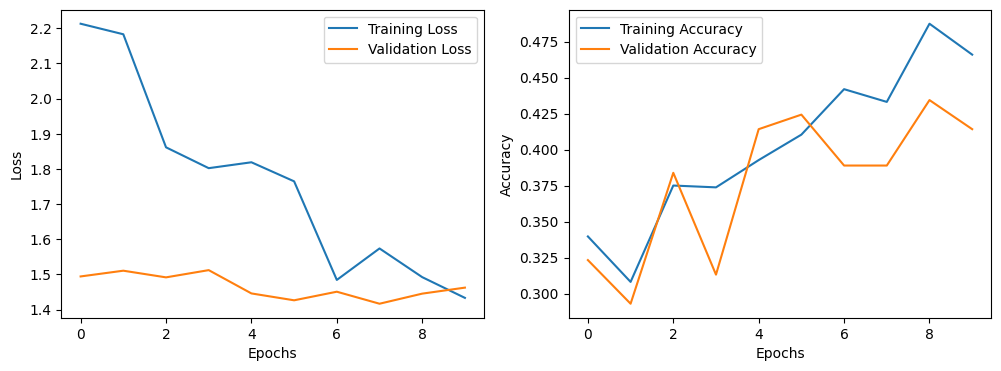

In [18]:
import matplotlib.pyplot as plt

# Plot learning curve mới
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()